In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]
# Ignore warnings

import warnings
# Set the warning filter to ignore FutureWarning
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [2]:
import os

# Lists files in the current directory
os.listdir()


['.config', 'sample_data']

In [4]:
full_data=pd.read_csv("covid_19_data.csv")

In [4]:
full_data.shape

(54030, 8)

In [5]:
full_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


**using seaborn library for plotting data**



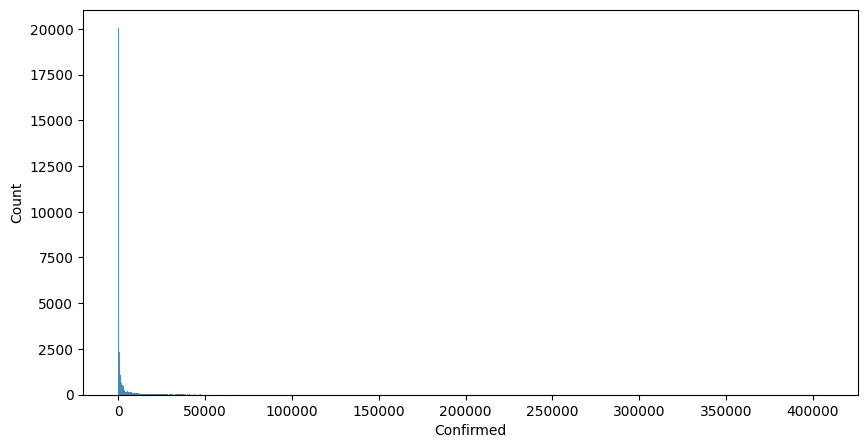

In [6]:
sns.histplot(full_data['Confirmed'],kde=False)
plt.show()
#distributionplot

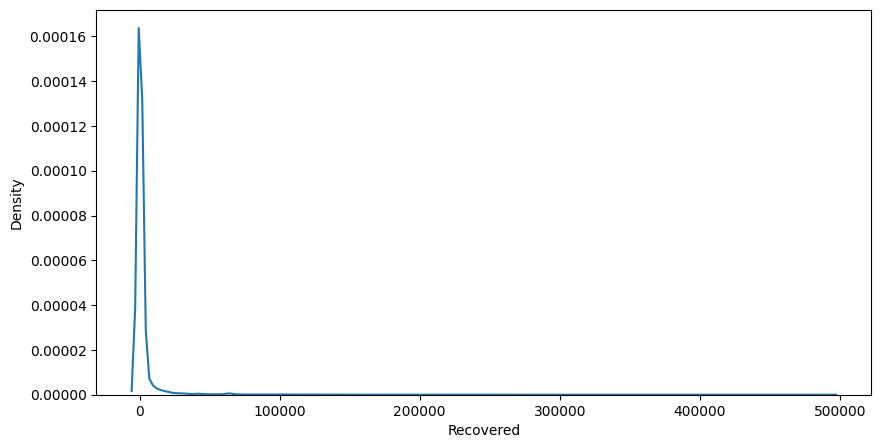

In [7]:
sns.distplot(full_data['Recovered'], hist=False)
plt.show()
#kdeplot

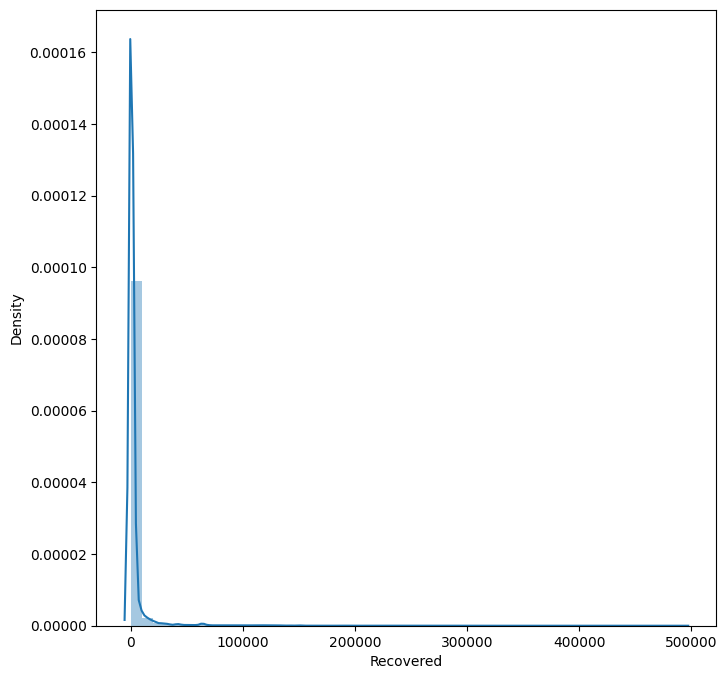

In [8]:
plt.figure(figsize=(8,8))
sns.distplot(full_data['Recovered'])
plt.show()

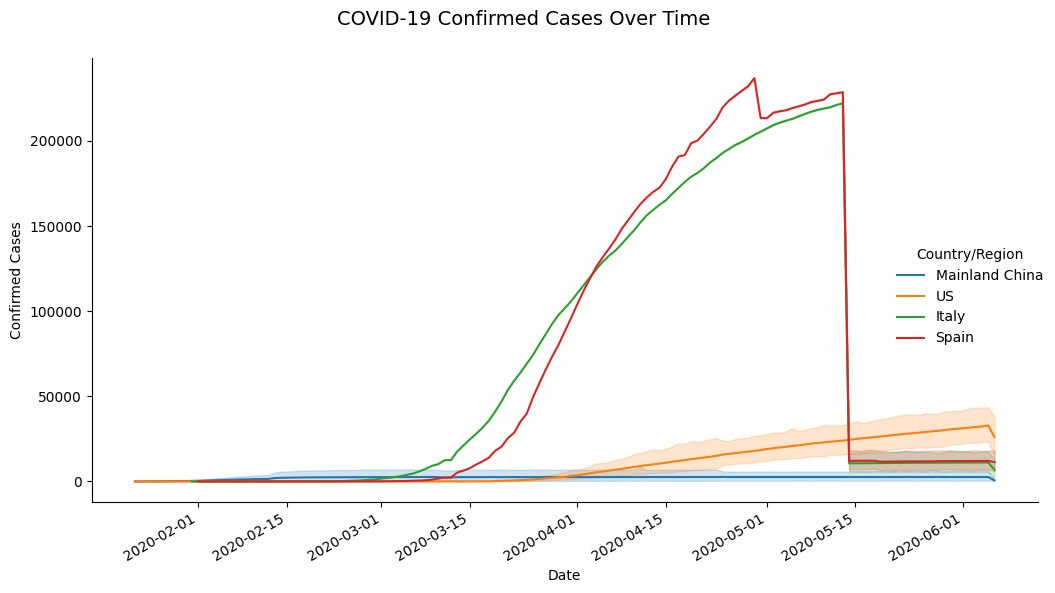

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert 'ObservationDate' to datetime
full_data["ObservationDate"] = pd.to_datetime(full_data["ObservationDate"], format='mixed', errors='coerce')

# Filter selected countries
countries_to_plot = ["Mainland China", "US", "Italy", "Spain"]
filtered_data = full_data[full_data["Country/Region"].isin(countries_to_plot)]

# Create the plot
g = sns.relplot(
    x="ObservationDate",
    y="Confirmed",
    hue="Country/Region",
    kind="line",
    data=filtered_data,
    height=6,
    aspect=1.5
)

# Format plot
g.set_axis_labels("Date", "Confirmed Cases")
g.fig.autofmt_xdate()  # Rotate date labels
g.fig.suptitle("COVID-19 Confirmed Cases Over Time", fontsize=14)
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)  # Adjust to prevent title overlap

plt.show()


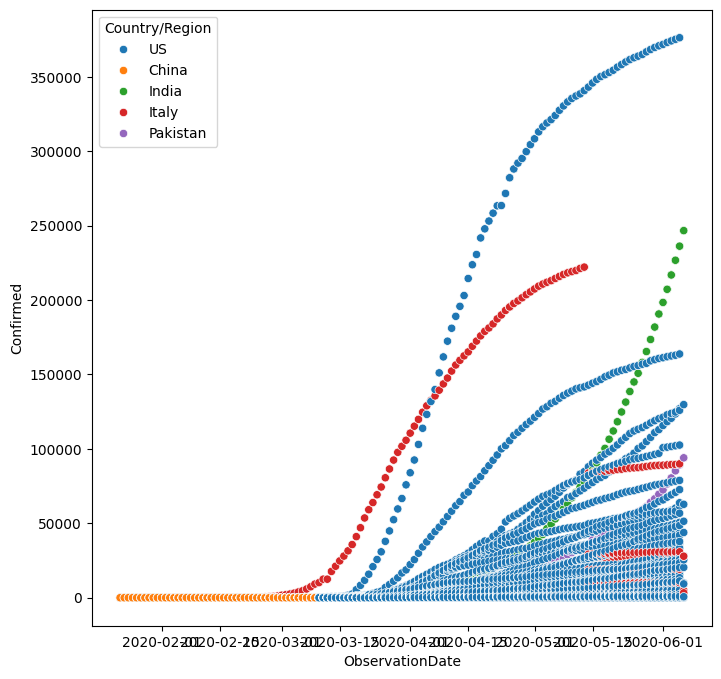

In [12]:
# Keep only selected countries to avoid clutter
full_data = full_data[full_data["Country/Region"].isin(["US", "India", "Italy", "China", "Pakistan"])]
plt.figure(figsize=(8,8))
sns.scatterplot(x="ObservationDate", y="Confirmed", hue="Country/Region", data=full_data)
plt.show()

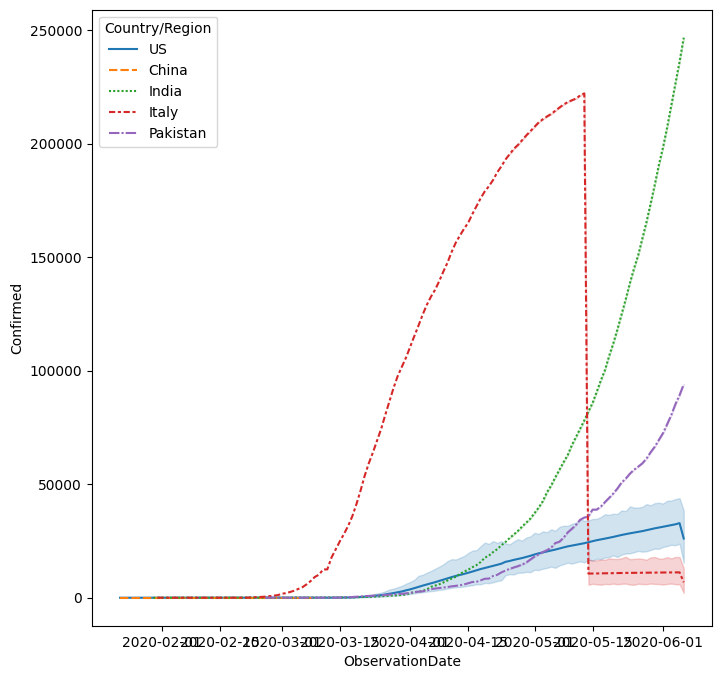

In [13]:
# Keep only selected countries to avoid clutter
full_data = full_data[full_data["Country/Region"].isin(["US", "India", "Italy", "China", "Pakistan"])]
plt.figure(figsize=(8,8))
sns.lineplot(x="ObservationDate", y="Confirmed", hue="Country/Region",style="Country/Region", data=full_data)
plt.show()

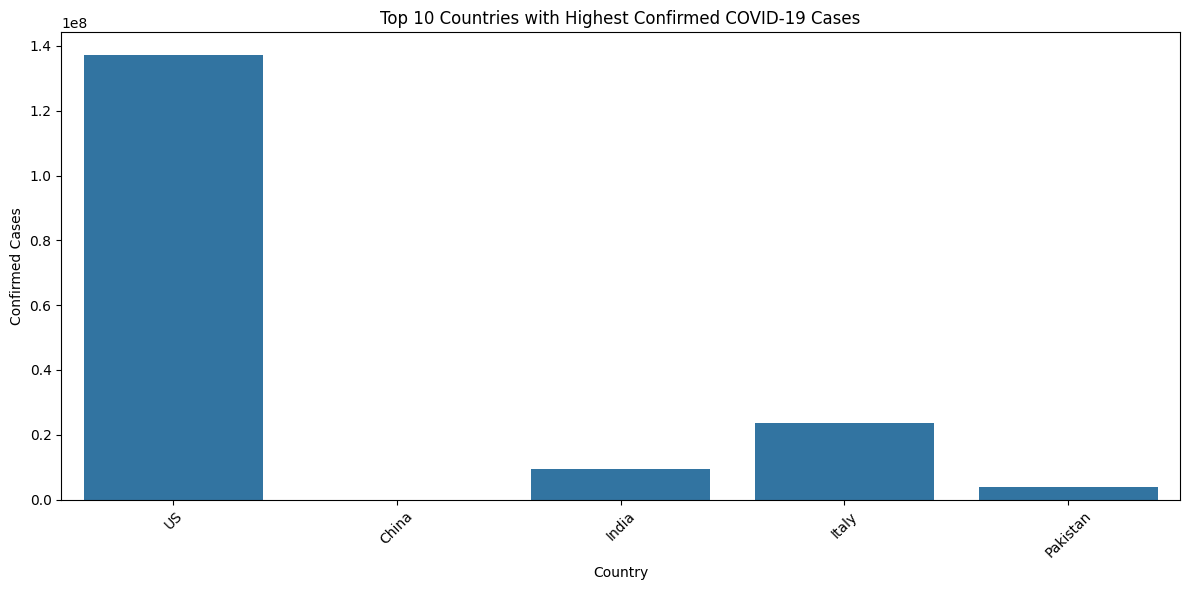

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot: Confirmed cases by Country (Top 10 only for clarity)
top_countries = full_data.groupby("Country/Region")["Confirmed"].sum().sort_values(ascending=False).head(10).index
filtered_data = full_data[full_data["Country/Region"].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.barplot(x="Country/Region", y="Confirmed", data=filtered_data, estimator=sum, ci=None)
plt.xticks(rotation=45)
plt.title("Top 10 Countries with Highest Confirmed COVID-19 Cases")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.show()


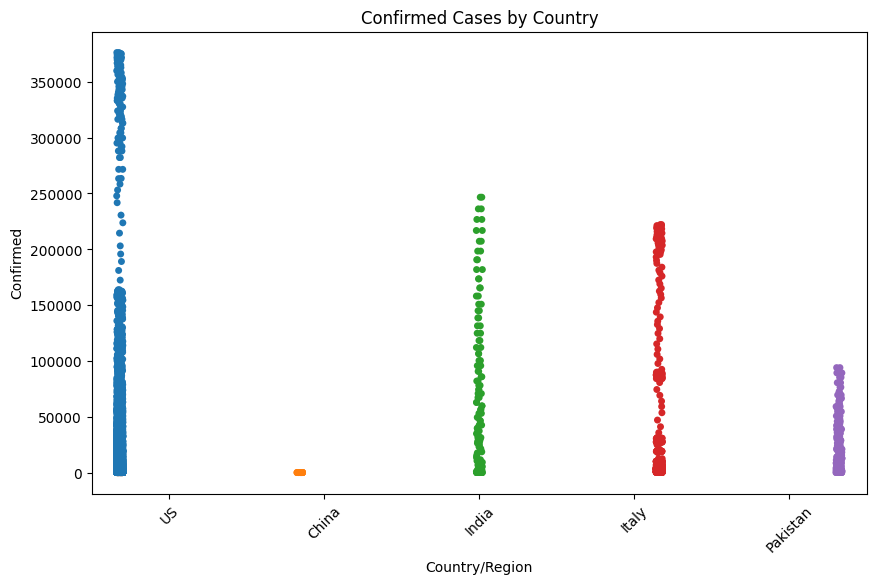

In [15]:
plt.figure(figsize=(10,6))
sns.stripplot(x="Country/Region", y="Confirmed", data=full_data, hue="Country/Region", dodge=True)
plt.xticks(rotation=45)
plt.title("Confirmed Cases by Country")
plt.show()


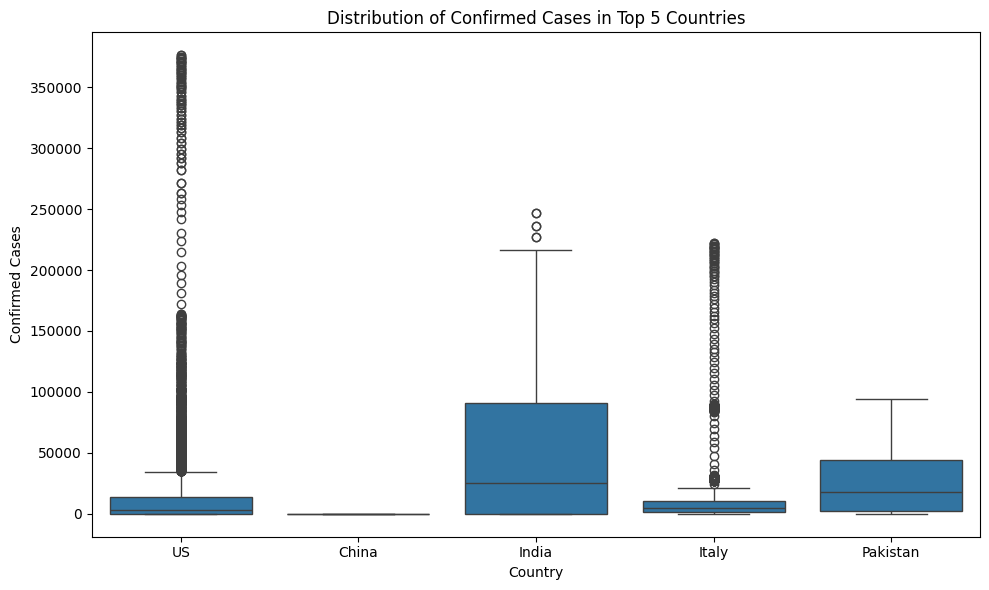

In [16]:
# Top 5 countries with highest max confirmed cases
top_countries = full_data.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(5).index
filtered_data = full_data[full_data["Country/Region"].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.boxplot(x="Country/Region", y="Confirmed", data=filtered_data)
plt.title("Distribution of Confirmed Cases in Top 5 Countries")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.show()


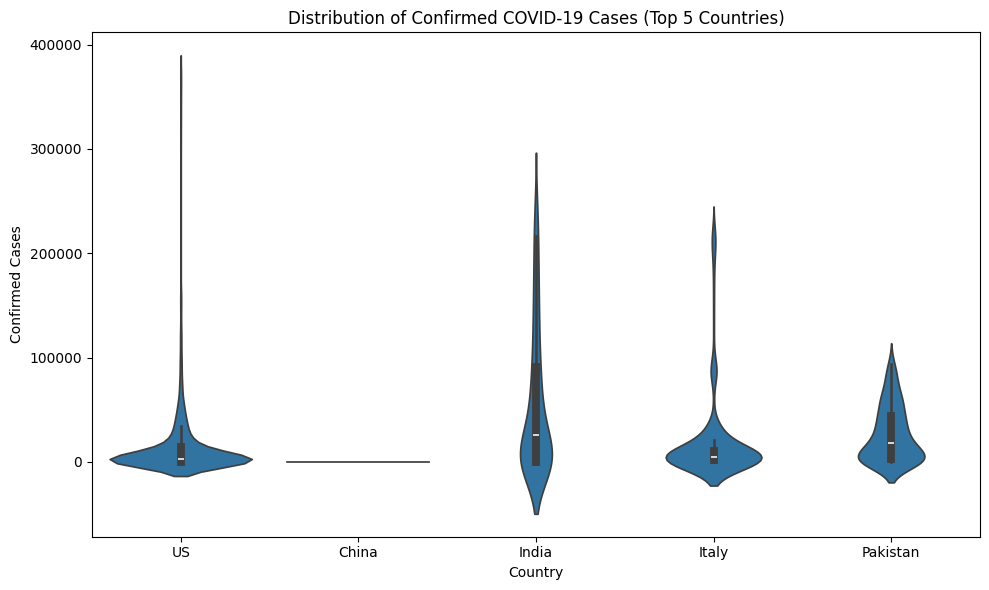

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Filter top 5 countries
top_countries = full_data.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(5).index
filtered_data = full_data[full_data["Country/Region"].isin(top_countries)]

plt.figure(figsize=(10, 6))
sns.violinplot(x="Country/Region", y="Confirmed", data=filtered_data)
plt.title("Distribution of Confirmed COVID-19 Cases (Top 5 Countries)")
plt.xlabel("Country")
plt.ylabel("Confirmed Cases")
plt.tight_layout()
plt.show()


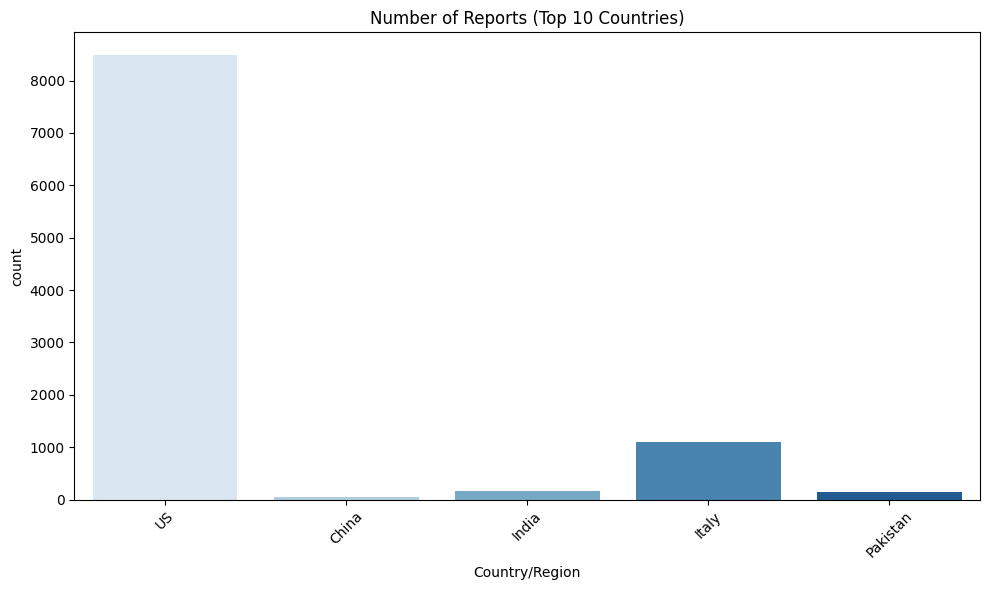

In [19]:
top_countries = full_data["Country/Region"].value_counts().head(10).index
filtered_data = full_data[full_data["Country/Region"].isin(top_countries)]

plt.figure(figsize=(10,6))
sns.countplot(x="Country/Region", data=filtered_data, palette="Blues")
plt.title("Number of Reports (Top 10 Countries)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


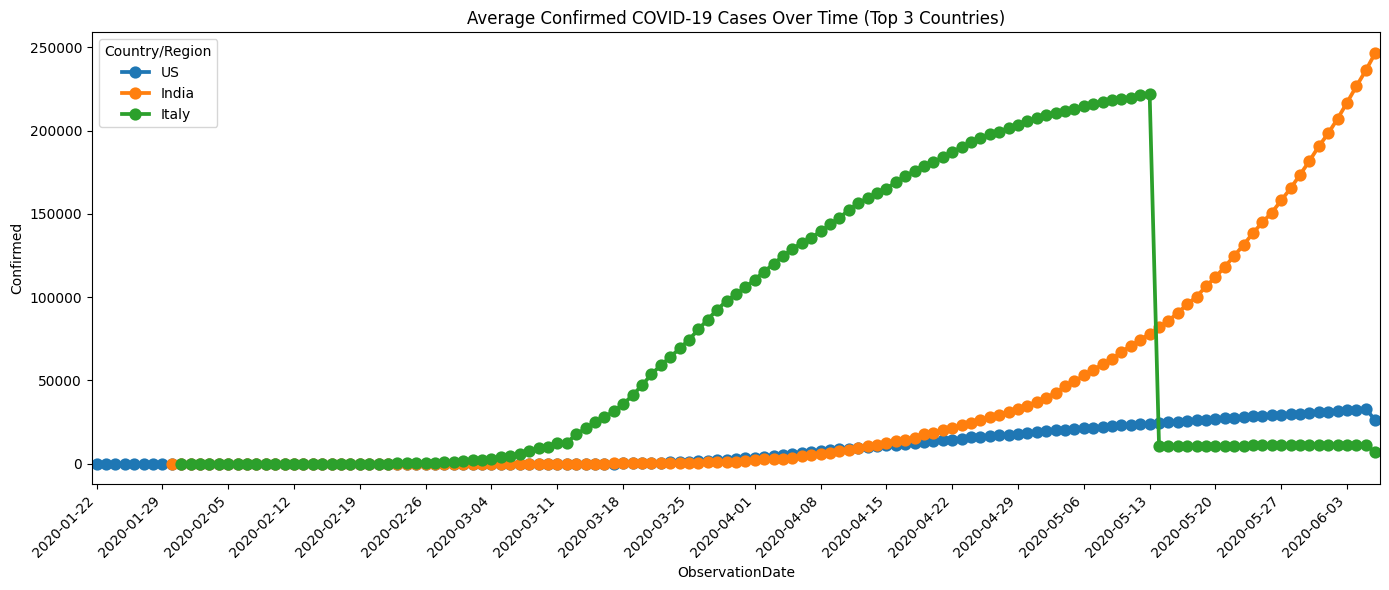

In [21]:
plt.figure(figsize=(14, 6))  # Make the figure wider

sns.pointplot(
    x="ObservationDate",
    y="Confirmed",
    hue="Country/Region",
    data=plot_data,
    markers="o",
    linestyles="-"
)

# Rotate and format date labels
plt.xticks(rotation=45, ha='right')  # Better angle and alignment

# Optional: Show fewer dates to prevent clutter
# Display every 7th label (weekly)
locs, labels = plt.xticks()
plt.xticks(ticks=locs[::7], labels=[label.get_text() for label in labels][::7])

plt.title("Average Confirmed COVID-19 Cases Over Time (Top 3 Countries)")
plt.tight_layout()
plt.show()


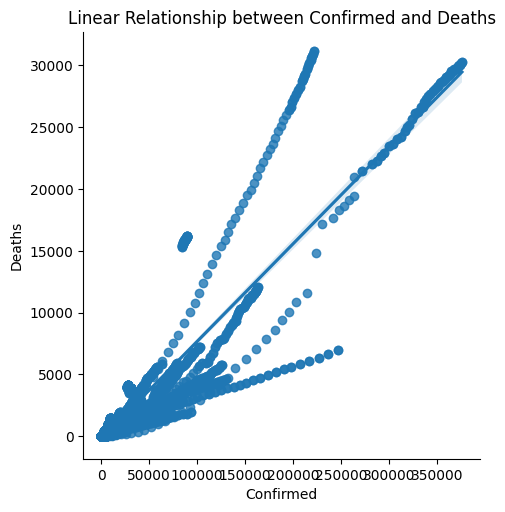

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example using confirmed and deaths if present
sns.lmplot(x="Confirmed", y="Deaths", data=full_data)
plt.title("Linear Relationship between Confirmed and Deaths")
plt.show()


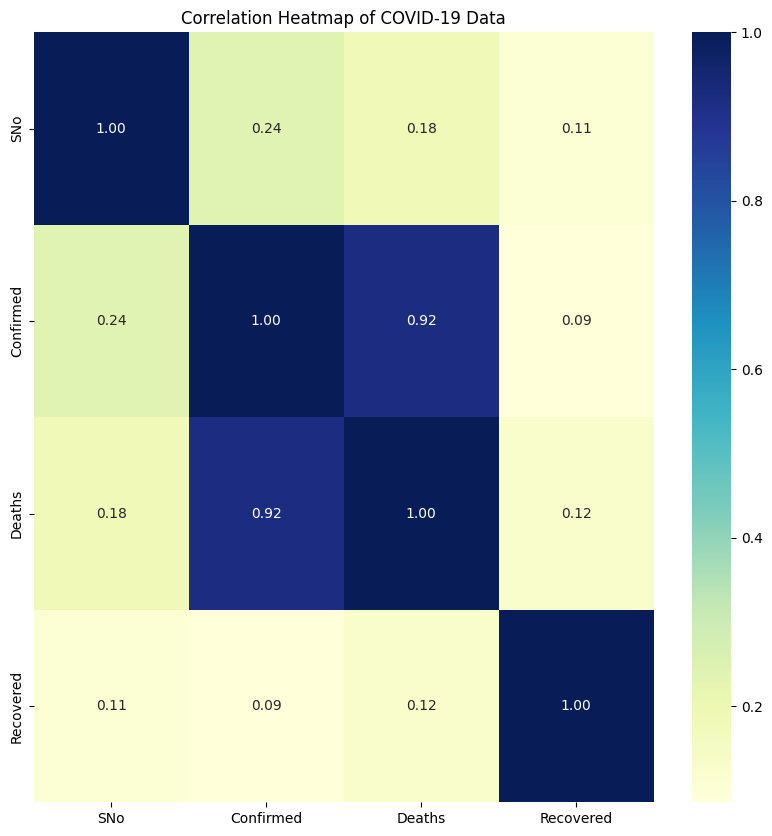

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns automatically
numeric_data = full_data.select_dtypes(include='number')

# Plot heatmap of correlation
plt.subplots(figsize=(10, 10))
sns.heatmap(numeric_data.corr(), cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Correlation Heatmap of COVID-19 Data")
plt.show()


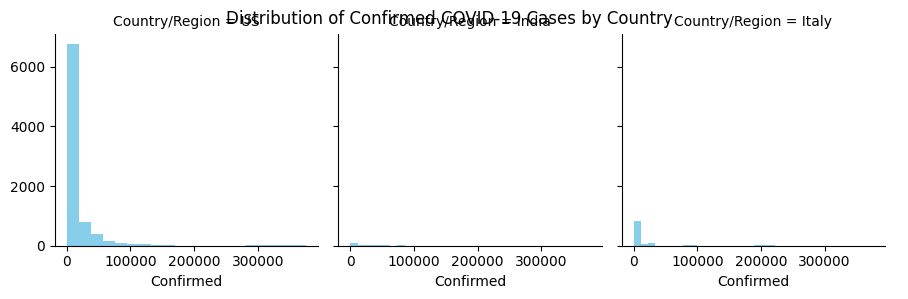

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Limit data to top 3 countries for clearer visualization
top_countries = full_data.groupby("Country/Region")["Confirmed"].max().sort_values(ascending=False).head(3).index
filtered_data = full_data[full_data["Country/Region"].isin(top_countries)]

# Convert date to readable format if not already
filtered_data["ObservationDate"] = pd.to_datetime(filtered_data["ObservationDate"], errors='coerce')

# Initialize the FacetGrid object
g = sns.FacetGrid(filtered_data, col="Country/Region", row=None)

# Draw histogram of confirmed cases per country
g.map(plt.hist, "Confirmed", bins=20, color='skyblue')
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Confirmed COVID-19 Cases by Country")
plt.show()


In [25]:
# Data Info
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9961 entries, 31 to 54833
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   SNo              9961 non-null   int64         
 1   ObservationDate  9961 non-null   datetime64[ns]
 2   Province/State   9521 non-null   object        
 3   Country/Region   9961 non-null   object        
 4   Last Update      9961 non-null   object        
 5   Confirmed        9961 non-null   float64       
 6   Deaths           9961 non-null   float64       
 7   Recovered        9961 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 958.4+ KB


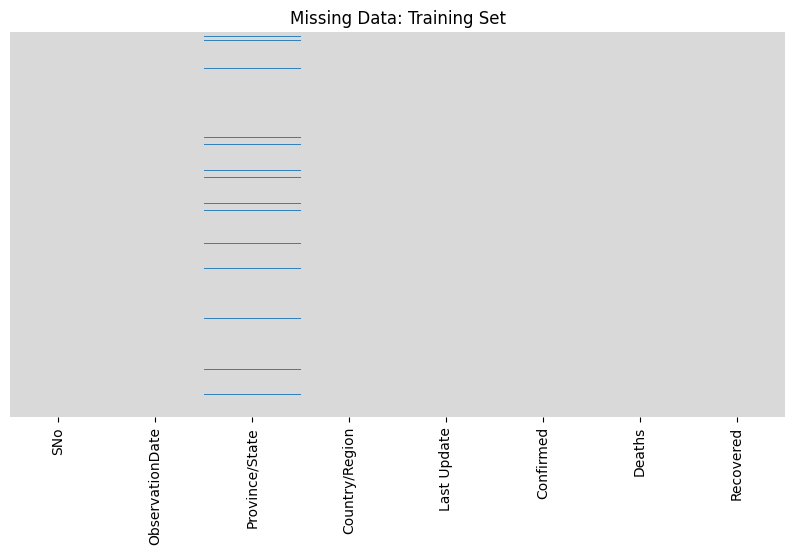

In [26]:
# Heatmap
sns.heatmap(full_data.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data: Training Set')
plt.show()

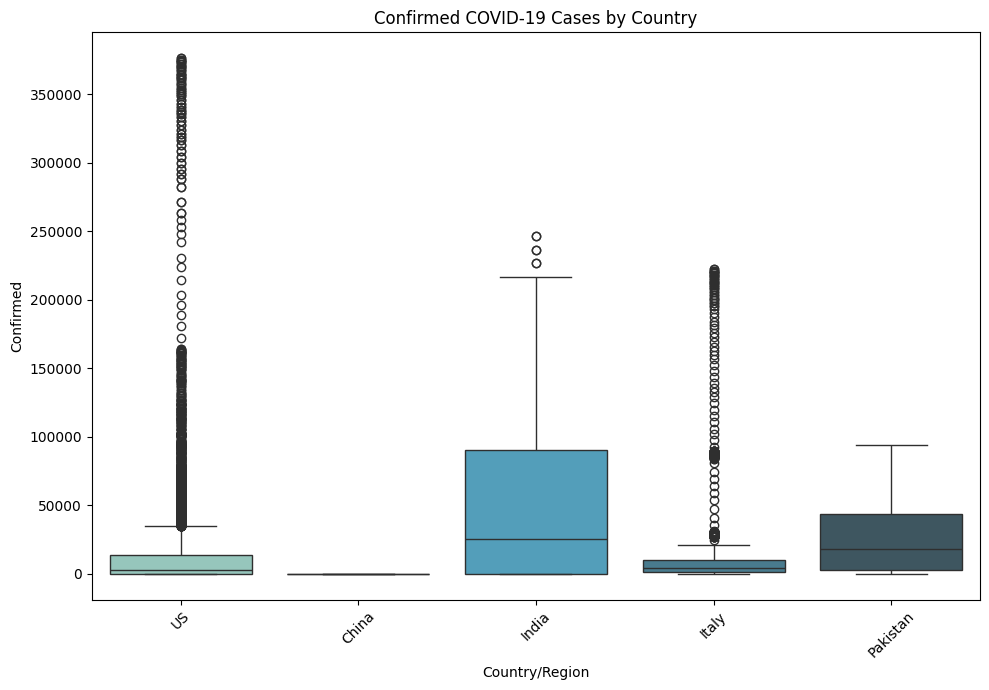

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 7))

# Example: Visualizing Confirmed cases by Country/Region
sns.boxplot(
    x='Country/Region',
    y='Confirmed',
    data=full_data,
    palette='GnBu_d'
).set_title('Confirmed COVID-19 Cases by Country')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [28]:
# Imputation function for Recovered cases
def impute_recovered(cols):
    Recovered = cols[0]
    Confirmed = cols[1]

    if pd.isnull(Recovered):
        # Simple logic: assume 60% of confirmed cases recover when missing
        return Confirmed * 0.6
    else:
        return Recovered

# Apply to COVID dataset
full_data['Recovered'] = full_data[['Recovered', 'Confirmed']].apply(impute_recovered, axis=1)


In [29]:
import pandas as pd

# Drop columns that are not useful or redundant
columns_to_drop = ['SNo', 'Province/State', 'Last Update']  # adjust if they exist
full_data.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Remove rows with missing country or confirmed cases
full_data.dropna(subset=['Country/Region', 'Confirmed'], inplace=True)

# Fix ObservationDate format if necessary
full_data['ObservationDate'] = pd.to_datetime(
    full_data['ObservationDate'], errors='coerce'
)

# Remove any rows where date couldn't be parsed
full_data.dropna(subset=['ObservationDate'], inplace=True)

# Convert numeric columns to proper types
numeric_cols = ['Confirmed', 'Deaths', 'Recovered']
for col in numeric_cols:
    full_data[col] = pd.to_numeric(full_data[col], errors='coerce').fillna(0).astype(int)

# Optional: sort data by date
full_data.sort_values('ObservationDate', inplace=True)

# Reset index after cleaning
full_data.reset_index(drop=True, inplace=True)


In [30]:
full_data

,ObservationDate,Country/Region,Confirmed,Deaths,Recovered
0,2020-01-22,US,1,0,0
1,2020-01-22,China,0,0,0
2,2020-01-23,US,1,0,0
3,2020-01-23,China,0,0,0
4,2020-01-24,US,1,0,0
...,...,...,...,...,...
9956,2020-06-06,US,62758,2688,0
9957,2020-06-06,Italy,3283,338,2784
9958,2020-06-06,US,51359,2178,0
9959,2020-06-06,US,179,5,0


In [31]:
# Numeric summary
full_data.describe()

,ObservationDate,Confirmed,Deaths,Recovered
count,9961,9961.000000,9961.000000,9961.000000
mean,2020-04-25 20:42:05.529565184,17495.732758,1154.312820,4086.414717
min,2020-01-22 00:00:00,0.000000,0.000000,0.000000
25%,2020-04-03 00:00:00,173.000000,4.000000,0.000000
50%,2020-05-04 00:00:00,3258.000000,113.000000,0.000000
75%,2020-05-21 00:00:00,14616.000000,676.000000,0.000000
max,2020-06-06 00:00:00,376208.000000,31106.000000,491706.000000
std,NaN,42538.560807,3642.344897,29142.336429


In [32]:
full_data.drop(['SNo', 'Province/State', 'Last Update'], axis=1, inplace=True, errors='ignore')


**GETTING MODEL READY**

In [33]:
# Shape of train data
full_data.shape

(9961, 5)

In [36]:
for col in full_data.select_dtypes(include=['object']).columns:
    full_data[col] = full_data[col].astype('category')


In [37]:
full_data.select_dtypes(['category']).columns


Index(['Country/Region'], dtype='object')

In [41]:
print(full_data.columns.tolist())


['ObservationDate', 'Country_Region', 'Confirmed', 'Deaths', 'Recovered']


In [43]:
import pandas as pd

# Sample DataFrame structure (replace this with your actual data loading step)
# full_data = pd.read_csv('your_file.csv')  # Example

# Convert 'Country_Region' into dummy variables
country_region_dummies = pd.get_dummies(full_data['Country_Region'], drop_first=True)

# Combine the dummy variables with the original DataFrame (excluding the original column)
full_data_encoded = pd.concat([full_data.drop('Country_Region', axis=1), country_region_dummies], axis=1)

In [44]:
full_data.head()

,ObservationDate,Country_Region,Confirmed,Deaths,Recovered
0,2020-01-22,US,1,0,0
1,2020-01-22,China,0,0,0
2,2020-01-23,US,1,0,0
3,2020-01-23,China,0,0,0
4,2020-01-24,US,1,0,0


In [45]:
# Step 1: Convert 'Country_Region' to dummy variables
country_dummies = pd.get_dummies(full_data['Country_Region'], drop_first=True)

# Step 2: Concatenate with the original DataFrame (excluding original column)
full_data = pd.concat([full_data.drop('Country_Region', axis=1), country_dummies], axis=1)

# Step 3: Display first 5 rows
full_data.head(5)

,ObservationDate,Confirmed,Deaths,Recovered,India,Italy,Pakistan,US
0,2020-01-22,1,0,0,False,False,False,True
1,2020-01-22,0,0,0,False,False,False,False
2,2020-01-23,1,0,0,False,False,False,True
3,2020-01-23,0,0,0,False,False,False,False
4,2020-01-24,1,0,0,False,False,False,True


In [46]:
# Check shape of data
print('full_data shape:', full_data.shape)

# Confirm column changes
print('Columns:', full_data.columns.tolist())

# Display first few rows
print(full_data.head())

full_data shape: (9961, 8)
Columns: ['ObservationDate', 'Confirmed', 'Deaths', 'Recovered', 'India', 'Italy', 'Pakistan', 'US']
  ObservationDate  Confirmed  Deaths  Recovered  India  Italy  Pakistan     US
0      2020-01-22          1       0          0  False  False     False   True
1      2020-01-22          0       0          0  False  False     False  False
2      2020-01-23          1       0          0  False  False     False   True
3      2020-01-23          0       0          0  False  False     False  False
4      2020-01-24          1       0          0  False  False     False   True


**MACHINE LEARNING**

In [47]:
# Define target variable
y = full_data['Deaths']

# Define feature matrix (drop the target column)
x = full_data.drop('Deaths', axis=1)

# Print shapes for confirmation
print('Feature matrix shape:', x.shape)
print('Target vector shape:', y.shape)

Feature matrix shape: (9961, 7)
Target vector shape: (9961,)


In [48]:
x
x.shape

(9961, 7)

In [49]:
y
y.shape

(9961,)

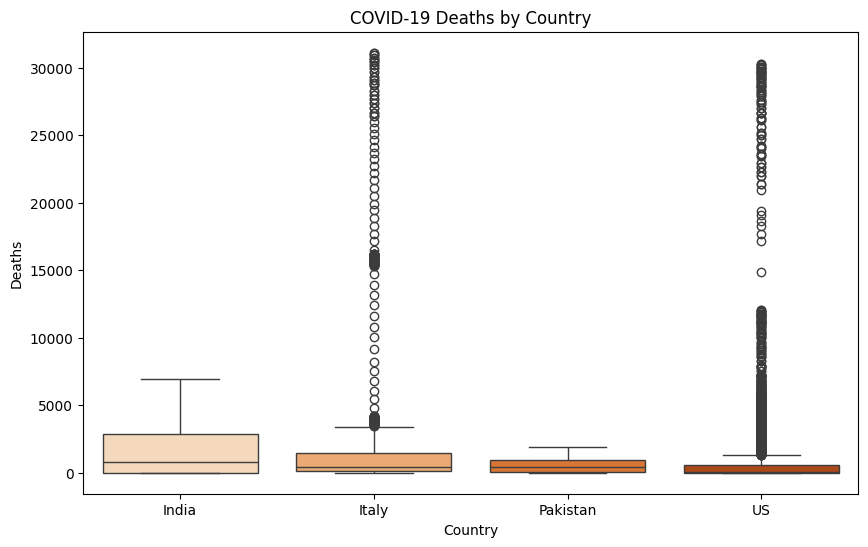

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First, melt the dummy columns back into a single 'Country' column
melted = full_data.melt(
    id_vars=['ObservationDate', 'Confirmed', 'Deaths', 'Recovered'],
    value_vars=['India', 'Italy', 'Pakistan', 'US'],
    var_name='Country',
    value_name='Flag'
)

# Keep only rows where the country flag is 1
melted = melted[melted['Flag'] == 1]

# Plot deaths by country
plt.figure(figsize=(10, 6))
sns.boxplot(x='Country', y='Deaths', data=melted, palette='Oranges')
plt.title('COVID-19 Deaths by Country')
plt.show()

In [62]:
# Use x and y variables to split the training data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .20, random_state = 101)

In [63]:
x_train.shape
x_train

,Confirmed,Recovered,India,Italy,Pakistan,US,Month,Day
6309,35788,9695,False,False,True,False,5,14
3155,922,0,False,False,False,True,4,14
1016,2,0,False,False,False,True,3,9
6749,7688,0,False,False,False,True,5,17
2731,1132,0,False,False,False,True,4,7
...,...,...,...,...,...,...,...,...
599,7,0,False,False,False,True,3,4
5695,4778,0,False,False,False,True,5,9
8006,19097,14641,False,True,False,False,5,25
1361,131,0,False,False,False,True,3,15


In [64]:
y_train

,Deaths
6309,770
3155,25
1016,0
6749,334
2731,29
...,...
599,0
5695,191
8006,1878
1361,1


In [65]:
x_test.shape
x_test

,Confirmed,Recovered,India,Italy,Pakistan,US,Month,Day
1941,340,0,False,False,False,True,3,25
4213,56462,0,False,False,False,True,4,27
2108,1406,0,False,False,False,True,3,28
2195,1164,0,False,False,False,True,3,29
8887,69,0,False,False,False,True,5,30
...,...,...,...,...,...,...,...,...
2053,536,0,False,False,False,True,3,27
2593,10357,0,False,False,False,True,4,4
4221,2354,0,False,False,False,True,4,27
9293,18917,0,False,False,False,True,6,2


In [58]:
# Ensure it's in datetime format
full_data['ObservationDate'] = pd.to_datetime(full_data['ObservationDate'])

# Naye features nikaalo: Month aur Day
full_data['Month'] = full_data['ObservationDate'].dt.month
full_data['Day'] = full_data['ObservationDate'].dt.day

In [59]:
full_data.drop('ObservationDate', axis=1, inplace=True)

In [60]:
x = full_data.drop('Deaths', axis=1)
y = full_data['Deaths']

In [61]:
x = full_data.drop('Deaths', axis=1)
y = full_data['Deaths']

In [67]:
# Import model
from sklearn.linear_model import LogisticRegression

print('Logistic Regression')
# Create instance of model
log_reg = LogisticRegression()

# Pass training data into model
log_reg.fit(x_train, y_train)

Logistic Regression


LogisticRegression()

In [68]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_log_reg = log_reg.predict(x_test)
# Score It

print('Logistic Regression')
# Accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) * 100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 11.19 %


In [69]:
from sklearn.tree import DecisionTreeClassifier

print('Decision Tree Classifier')
# Create instance of model
Dtree = DecisionTreeClassifier()

# Pass training data into model
Dtree.fit(x_train, y_train)

Decision Tree Classifier


DecisionTreeClassifier()

In [70]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_Dtree = Dtree.predict(x_test)
# Score It

print('Decision Tree Classifier')
# Accuracy
print('--'*30)
Dtree_accuracy = round(accuracy_score(y_test, y_pred_Dtree) * 100,2)
print('Accuracy', Dtree_accuracy,'%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy 68.89 %


In [71]:
from sklearn.ensemble import RandomForestClassifier

print('Random Forest Classifier')
# Create instance of model
rfc = RandomForestClassifier()

# Pass training data into model
rfc.fit(x_train, y_train)


Random Forest Classifier


RandomForestClassifier()

In [72]:
from sklearn.metrics import accuracy_score
# prediction from the model
y_pred_rfc = rfc.predict(x_test)
# Score It

print('Random Forest Classifier')
# Accuracy
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 68.79 %


In [84]:
# Sample model scores (replace these with your actual model scores)
model_scores = {
    "Logistic Regression": log_reg_accuracy,
    "Decision Tree Classifier": Dtree_accuracy,
    "Random Forest Classifier": rfc_accuracy,

}

# Sort the model scores in descending order based on their values (higher values first)
sorted_scores = sorted(model_scores.items(), key=lambda x: x[1], reverse=True)

# Display the ranking of the models
print("Model Rankings (Greater Values are better):")
for rank, (model_name, score) in enumerate(sorted_scores, start=1):
    print(f"{rank}. {model_name}: {score}")


Model Rankings (Greater Values are better):
1. Decision Tree Classifier: 68.89
2. Random Forest Classifier: 68.79
3. Logistic Regression: 11.19
